### Loan Data Analysis - BIDA406 Assignment 2 - Roma Rico Flores

####
Data Used - https://www.kaggle.com/datasets/zhijinzhai/loandata <br />
Project Guide - https://www.kaggle.com/code/varunmarvah/loan-dataset-analysis-basics || https://www.kaggle.com/code/gcdatkin/loan-payment-prediction-100-accuracy

#### Libraries used
1. Numpy
2. Pandas
3. Seaborn
4. Sklearn
5. XGBoost

#### Exploratory Data Analysis

In [20]:
#Import basic exploratory data analysis/visualization tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib library for visualisation 
%matplotlib inline
import seaborn as sns

#Import sklearn preprocessing tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Import sklearn data modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [21]:
#Load data and save the dataframe into variable df
df = pd.read_csv("loan-payments-data.csv")
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [22]:
#Finding the unique values from the loan status so I know what the status states of loans are

df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [23]:
df['terms'].unique()

array([30, 15,  7], dtype=int64)

My Understanding of Data:
1. Loan_id - a unique ID field assigned to specific loans
2. Loan_status - tells whether the loan is (1) already paid off (2) in collection process or (3) paid off after the collection efforts
3. Principal
4. terms - schedule of payment whether monthly, bi-weekly (15), or weekly (7)
5. Effective_date - date when the loan started
6. Due_date
7. Paidoff_time - date and time when loan was paid off, null means loan is yet to be paid
8. Pastdue_days - How many days a loan has past due date
9. Age
10. Education
11. Gender

In [24]:
#Pandas descibe function is used to check data's descriptive statistics  including central tendency metrics, dispersion and shape of a dataset’s distribution.
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [25]:
#Checking summary of dataset including the data type/schema and no. of non-null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [26]:
#Checking if there are any nulls in each column
df.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [27]:
#Checking the number of unique entries in each column, curly braces are used when defining a dictionary data type in Python
{column: len(df[column].unique()) for column in df.columns}

{'Loan_ID': 500,
 'loan_status': 3,
 'Principal': 6,
 'terms': 3,
 'effective_date': 7,
 'due_date': 25,
 'paid_off_time': 321,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2}

In [28]:
#Checking dataset shape (i.e. rows, columns)
df.shape

(500, 11)

#### Exploratory Data Analysis

In [29]:
#Data visualization - set background to be just white
sns.set(style="whitegrid") 

In [30]:
#Quick check of data correlations
df_corr = df.corr()
df_corr

C:\Users\flore\AppData\Local\Temp\ipykernel_18464\3888131818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


In [31]:
#Using heat map to quickly viusalize the correlation table but we can't truly visualize our data here since correlation only works for numerical values

<Axes: >

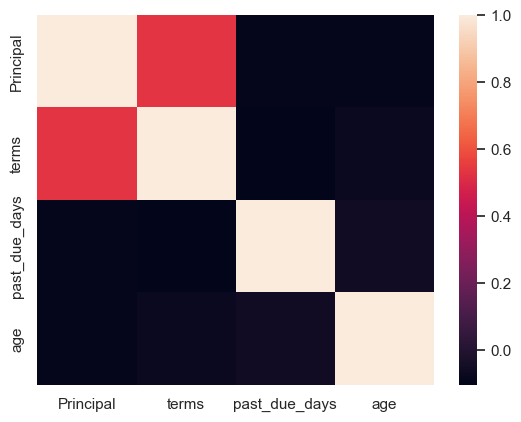

In [32]:
sns.heatmap(df_corr)

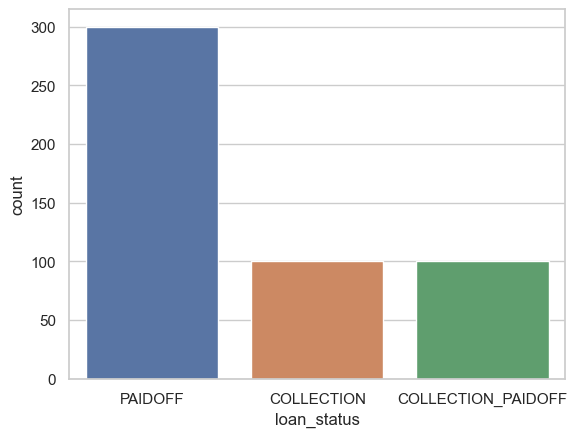

In [33]:
# First of all lets find out how many loan cases are Paid Off, Collection or Collection_PaidOff status
x = sns.countplot(x="loan_status", data=df)

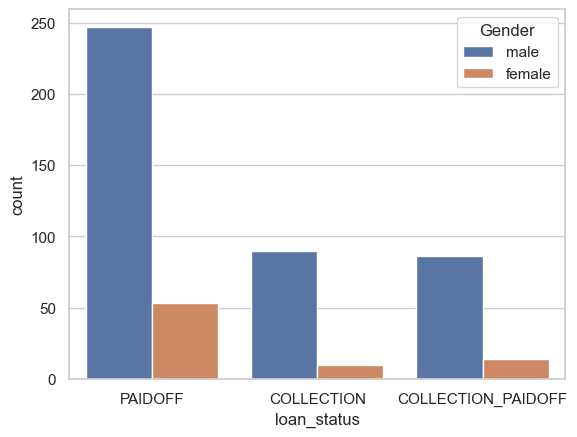

In [34]:
#Checking loan status based on gender, i.e. double bar chart wherein the color indicates gender
y = sns.countplot(x="loan_status", data=df , hue='Gender')

Chart shows that there girls have lesser loans overall.<br/>
Checking the loan totals for: weekly (7 days), Fortnightly (15 Days) , Monthly (30days) payments and their loan status.

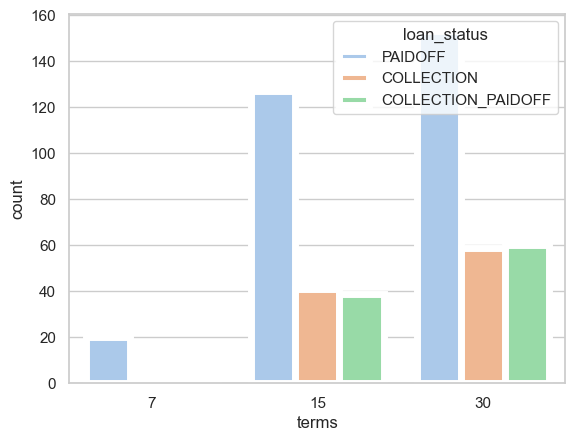

In [35]:
x = sns.countplot(x="terms", data=df , hue='loan_status', palette='pastel', linewidth=5)

There is relatively fewer loans on a weekly schedule compared to the bi-weekly and monthly payment modes.

Let's check if level of education affects loan amount and payment status.

In [ ]:
#Code not working

#g = sns.catplot("loan_status", col="education", col_wrap=4,
#                 data=mydf[mydf.loan_status.notnull()],
#                 kind="count", height=12.5, aspect=.6)

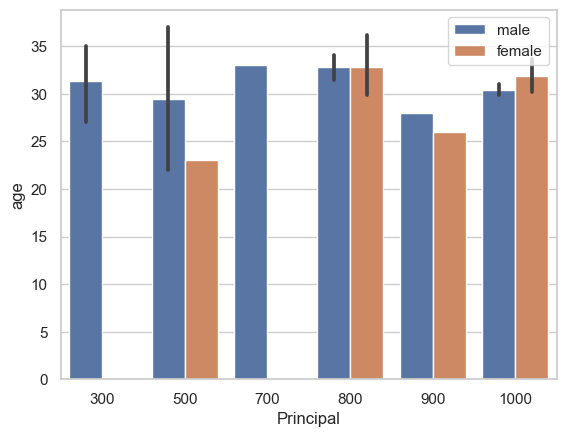

In [46]:
# Age vs Principal amount based on Gender
# Black bar indicates the the error bar. This represents the variability of data
# and used on graphs to indicate the error or uncertainty in a reported measurement.

ax = sns.barplot(x="Principal", y="age",hue="Gender" ,  data=df)
ax.legend(loc="upper right")

Data Modeling

In [47]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [50]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop Loan_ID column
    df = df.drop('Loan_ID', axis=1)
    
    # Create date/time columns
    for column in ['effective_date', 'due_date', 'paid_off_time']:
        df[column] = pd.to_datetime(df[column])
    
    df['effective_day'] = df['effective_date'].apply(lambda x: x.day)
    
    df['due_month'] = df['due_date'].apply(lambda x: x.month)
    df['due_day'] = df['due_date'].apply(lambda x: x.day)
    
    df['paid_off_month'] = df['paid_off_time'].apply(lambda x: x.month)
    df['paid_off_day'] = df['paid_off_time'].apply(lambda x: x.day)
    df['paid_off_hour'] = df['paid_off_time'].apply(lambda x: x.hour)
    
    df = df.drop(['effective_date', 'due_date', 'paid_off_time'], axis=1)
    
    # Fill missing values with column means
    for column in ['past_due_days', 'paid_off_month', 'paid_off_day', 'paid_off_hour']:
        df[column] = df[column].fillna(df[column].mean())
    
    # Binary encode the Gender column
    df = binary_encode(df, 'Gender', positive_value='male')
    
    # Ordinal encode the education column
    education_ordering = [
        'High School or Below',
        'college',
        'Bechalor',
        'Master or Above'
    ]
    df = ordinal_encode(df, 'education', ordering=education_ordering)
    
    # Encode the label (loan_status) column
    label_mapping = {'COLLECTION': 0, 'PAIDOFF': 1, 'COLLECTION_PAIDOFF': 2}
    df['loan_status'] = df['loan_status'].replace(label_mapping)
    
    # Split df into X and y
    y = df['loan_status'].copy()
    X = df.drop('loan_status', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [51]:
X, y = preprocess_inputs(df)

In [54]:
#Features/Input:
X

,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour
0,0.493377,0.897891,0.000000,2.284043,-1.022825,0.426653,-3.126073,0.664986,-1.303142,-1.035098,-0.463997,1.339835
1,0.493377,0.897891,0.000000,3.106587,1.771779,-2.343823,-3.126073,0.664986,-1.303142,0.690066,-1.475829,-1.072109
2,0.493377,0.897891,0.000000,0.309935,1.771779,-2.343823,-3.126073,0.664986,-1.303142,-1.035098,1.126025,0.616252
3,0.493377,-0.978972,0.000000,-0.677119,0.374477,0.426653,-3.126073,-1.094236,0.724148,-1.035098,0.692382,1.581030
4,0.493377,0.897891,0.000000,-0.512610,0.374477,-2.343823,-2.209336,0.664986,-1.167989,-1.035098,0.836930,1.822224
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.493377,0.897891,-1.780899,-0.512610,-1.022825,0.426653,0.540875,0.664986,-0.762531,0.690066,-0.463997,1.339835
496,0.493377,-0.978972,-1.187446,-0.841628,-1.022825,0.426653,0.540875,-1.094236,1.264758,0.690066,-1.042187,1.581030
497,-1.243866,-0.978972,-1.780899,-0.183592,0.374477,0.426653,0.540875,-1.094236,1.264758,-1.035098,1.704214,-0.589721
498,0.493377,0.897891,-1.888799,1.132480,0.374477,-2.343823,0.540875,2.424209,-0.897684,2.415229,-0.897640,2.063419


In [55]:
#Target/outputs:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    2
496    2
497    2
498    2
499    2
Name: loan_status, Length: 500, dtype: int64

In [56]:
#Splitting test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [57]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

for model in models:
    model.fit(X_train, y_train)

c:\Users\flore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest",
    "               XGBoost"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 98.6667%
Support Vector Machine: 98.6667%
         Decision Tree: 100.0000%
        Neural Network: 100.0000%
         Random Forest: 100.0000%
               XGBoost: 100.0000%
